## Presenter notes with Carpentries Python Gapminder training
*Martijn Wehrens, m.wehrens@uva.nl, 2025-03-04*

### Modifications to this lesson

This material was modified to include `matplotlib.pyplot` and `seaborn`, two commonly used tools, and exclude the `pandas.DataFrame.plot`, which we think is less commonly used.

## Plotting 

Text(0, 0.5, 'Position (km)')

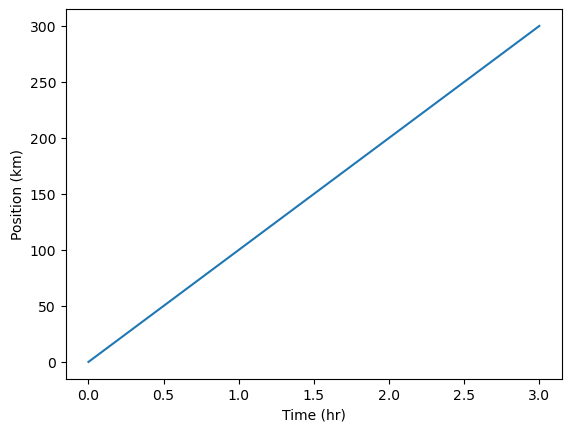

In [1]:
# matplotlib most widely used
    # or sub library "pyplot"
    # will render inline by default

import matplotlib.pyplot as plt

# simple plot

time = [0, 1, 2, 3]
position = [0, 100, 200, 300]

plt.plot(time, position)
plt.xlabel('Time (hr)')
plt.ylabel('Position (km)')

In [ ]:
# when running python differently
    # e.g. terminal
    # also need "plt.show()" 
        # and also plt.close()
        


In [ ]:
# Can also use "seaborn"
    # Based on matplotlib
        # Usually used together
    # Additional features geared towards dfs

# How to install seaborn in Jupyter
%pip install seaborn
    # only needed in online version
    # done differently locally


<Axes: xlabel='None', ylabel='Australia'>

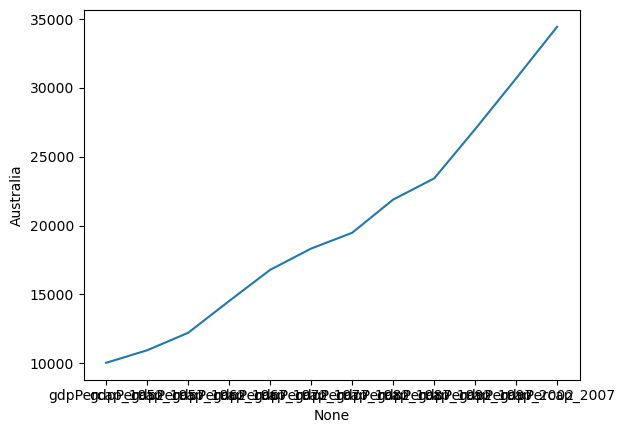

In [14]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/Users/m.wehrens/Data_UVA/2024_teaching/2025-03-gapminder/data/gapminder_gdp_oceania.csv', index_col='country')

data.head()

sns.lineplot(x=data.columns, y = data.loc['Australia',:])
# plt.show(); plt.close()

# why do we see ugly axis?
    # we'll do something about this later


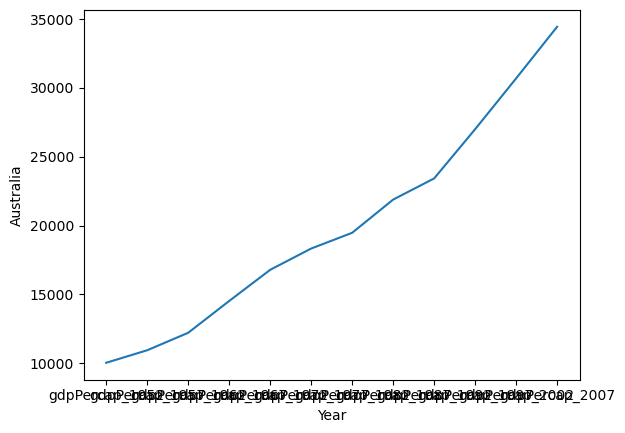

In [15]:
    
# more convenient:
    # dfs as input directly
    # certain expecations from the data
    # series to plot should be in columns
    
    # re-arrange our df
        
data_transposed = data.T
data_transposed['Year'] = data.columns
data_transposed.head()

sns.lineplot(data_transposed, x='Year', y = 'Australia')
plt.show(); plt.close()


In [16]:

# more re-arrangements needed for full options

# "long format"

    # column = variable or condition
    # row = measurement
    
    # Current format:
    # country           Australia  New Zealand            Year
    # gdpPercap_1952  10039.59564  10556.57566  gdpPercap_1952
    # gdpPercap_1957  10949.64959  12247.39532  gdpPercap_1957
    # gdpPercap_1962  12217.22686  13175.67800  gdpPercap_1962
    # gdpPercap_1967  14526.12465  14463.91893  gdpPercap_1967
    # gdpPercap_1972  16788.62948  16046.03728  gdpPercap_1972
    # (..)
    #
    # Goal:
    #             Year      Country          GDP
    # 0   gdpPercap_1952    Australia  10039.59564
    # 1   gdpPercap_1957    Australia  10949.64959
    # 2   gdpPercap_1962    Australia  12217.22686
    # 3   gdpPercap_1967    Australia  14526.12465
    # 4   gdpPercap_1972    Australia  16788.62948
    # 5   gdpPercap_1977    Australia  18334.19751
    # 6   gdpPercap_1982    Australia  19477.00928
    # 7   gdpPercap_1987    Australia  21888.88903
    # 8   gdpPercap_1992    Australia  23424.76683
    # 9   gdpPercap_1997    Australia  26997.93657
    # 10  gdpPercap_2002    Australia  30687.75473
    # 11  gdpPercap_2007    Australia  34435.36744
    # 12  gdpPercap_1952  New Zealand  10556.57566
    # (..)

data_long = data_transposed.melt(id_vars='Year', var_name='Country', value_name='GDP')
    # id_vars: identifier variables
    #   identifying a specific observation
    #   keep those
    #       new id vars will be added, in this case country
    # var_name: name used the new id parameter
        # here, column names Australia, New Zealand ---> these are countries
    # value_name: name given to the values, which are taken from multiple columns
    # 
    #    - Identifier variables are called this because they uniquely **identify a specific observation** in the dataset. 
    #      These variables are not measured or calculated but instead serve to distinguish one observation from another.
    #    - In this example, `Year` and `Country` are identifier variables because they uniquely identify each observation 
    #      (e.g., GDP of Australia in 1952).

print(data_long.head())

# OPTIONAL ##########

data2 = data.copy()
data2['Country']=data2.index
data_long2 = data2.melt(id_vars='Country', var_name='Year', value_name='GDP')

    # Let's not go into technicalities
        # sometimes a = b
            # a "reference" is made
            # instead of new parameter
    # list1 = [1,2,3]
    # list2 = list1
    # list2[1] = 44
    # list1
    # list2
    
# END OPTIONAL ##########


             Year    Country          GDP
0  gdpPercap_1952  Australia  10039.59564
1  gdpPercap_1957  Australia  10949.64959
2  gdpPercap_1962  Australia  12217.22686
3  gdpPercap_1967  Australia  14526.12465
4  gdpPercap_1972  Australia  16788.62948


<Axes: xlabel='Year', ylabel='GDP'>

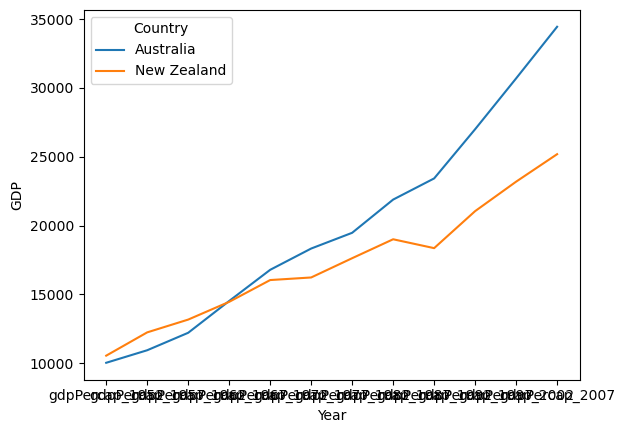

In [17]:

sns.lineplot(data_long, x='Year', y = 'GDP', hue='Country')
# plt.show(); plt.close()


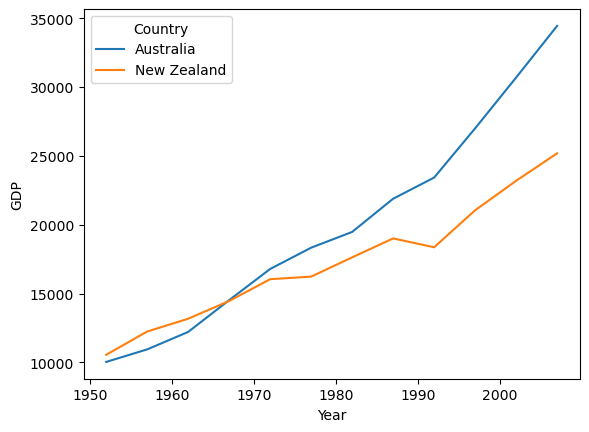

In [18]:

# Finally
    # Fix years

# search and replace
    # keep year
    # remove rest

years = data_long['Year'].str.replace('gdpPercap_', '')
    # MW:
    # "str" is a method which holds more methods 
        # related to string operations
        # str is also part of python standard library
        # stand-alone example: str.replace('hoi', 'oi', '') 

# convert to int
# put back in dataframe
data_long['Year'] = years.astype(int)

# Plot again
sns.lineplot(data_long, x='Year', y = 'GDP', hue='Country')
plt.show(); plt.close()

<Axes: xlabel='Year', ylabel='GDP'>

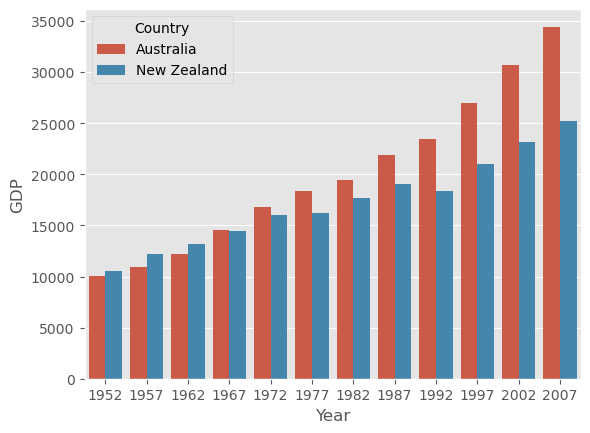

In [ ]:
# Change
    # Plot types
    # Style
    # Seaborn can be manipulated by matplotlib    

# Example
plt.style.use('ggplot')

# Other type, bars
sns.barplot(data_long, x='Year', y = 'GDP', hue='Country')

# use google to tweak
# for nice examples:
    # https://matplotlib.org/stable/gallery/ 
    # https://seaborn.pydata.org/examples/index.html


Text(0.5, 1.0, 'GDPs of different countries')

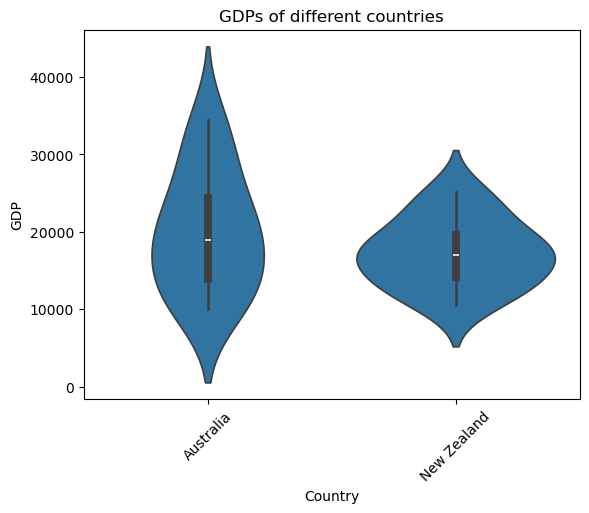

In [24]:
# Something else

plt.style.use('default')
sns.violinplot(data_long, x='Country', y = 'GDP')
plt.xticks(rotation=45)
plt.title('GDPs of different countries')

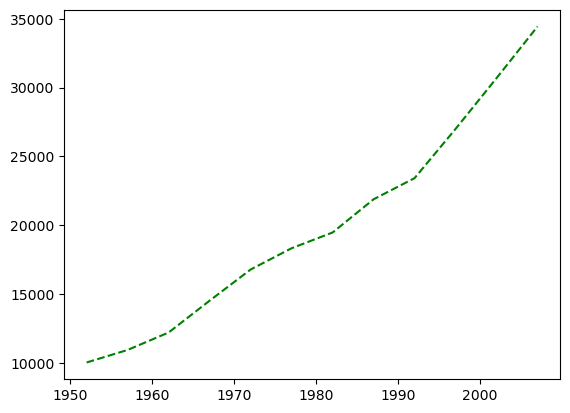

In [31]:
# Calling matplotlib.pyplot directly

# plt.plot(x, y) like above
    # also can choose different plot styles and tweak features
        # e.g.

selected_rows = data_long['Country']=='Australia'
years = data_long.loc[selected_rows,'Year']
gdp_australia = data_long.loc[selected_rows,'GDP']

plt.plot(years, gdp_australia, linestyle='--', color='g')

# we can also use a shorthand argument:
# plt.plot(years, gdp_australia, fmt='g--')

# more brief
# plt.plot(years, gdp_australia, 'g--')


Text(0, 0.5, 'GDP per capita ($)')

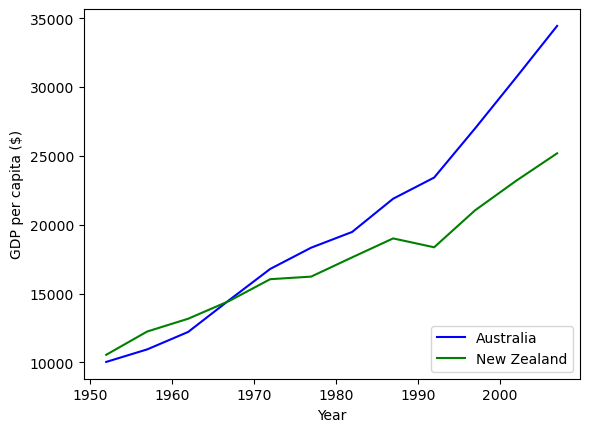

In [32]:
# combining data

# Select two countries' worth of data.

gdp_nz = data_long.loc[data_long['Country']=='New Zealand','GDP']

# Plot with differently-colored markers.
plt.plot(years, gdp_australia, 'b-', label='Australia')
plt.plot(years, gdp_nz, 'g-', label='New Zealand')

# Create legend.
#plt.legend()
plt.legend(loc='lower right') 
plt.xlabel('Year')
plt.ylabel('GDP per capita ($)')


# about legend, 
    # 2 stages to create:
        # "label" argument to label each set of data
        # create legend
            # plt.legend()
    # legend placement
        # can use "loc" argument 
            # per default, tries to find good position
                # (show this)


<Axes: xlabel='Australia', ylabel='New Zealand'>

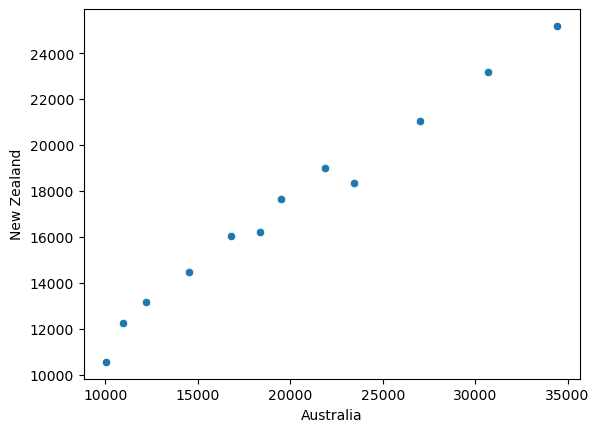

In [ ]:
# scatter plot

# other style
# plt.scatter(gdp_australia, gdp_nz)

# can be done directly from dataframe also
sns.scatterplot(data_transposed, x = 'Australia', y = 'New Zealand')


## Exercises (modified bioDSC)

### Minima and Maxima

Fill in the blanks below to plot the minimum GDP per capita over time for all the countries in Europe. Modify it again to plot the maximum GDP per capita over time for Europe.

```python
data_europe = pd.read_csv('/Users/m.wehrens/Desktop/python_course/data/gapminder_gdp_europe.csv', index_col='country')
data_europe_transposed = data_europe.T

data_europe_transposed['min'] = data_europe_transposed.____
data_europe_transposed['max'] = ____
data_europe_transposed['year'] = ____

sns.lineplot(data_europe_transposed, x='year', y='min')
sns.lineplot(data_europe_transposed, x='year', y='max')
plt.legend(loc='best')
plt.xticks(rotation=90)
```

bioDSC HINT: if you don't see the solution, take it step by step. Break down the task in subtasks, and adress the first step towards the solution first. Try that first. Running code is free.

### Correlations

Modify the code from "Minima and Maxima" exercise to create a scatter plot showing the relationship between the minimum and maximum GDP per capita across the countries in Asia, with each point in the plot corresponding to a year. What relationship do you see (if any)?

### Correlations (continued)

You might note that the variability in the maximum is much higher than that of the minimum. Take a look at the maximum and the max indexes:

```python
data_asia = pd.read_csv('data/gapminder_gdp_asia.csv', index_col='country')

df_max_GDP = pd.DataFrame()
df_max_GDP['GDP_max'] = data_asia.max()
df_max_GDP['Year']    = data_asia.columns.str.replace('gdpPercap_','').astype(int)

plt.plot(df_max_GDP['Year'], df_max_GDP['GDP_max'])

print(data_asia.idxmax())
print(data_asia.idxmin())
```

### More Correlations

This short program creates a plot showing the correlation between GDP and life expectancy for 2007, normalizing marker size by population:

```python
data_all = pd.read_csv('data/gapminder_all.csv', index_col='country')
sns.scatterplot(data_all, x='gdpPercap_2007', y='lifeExp_2007', s=data_all['pop_2007']/1e6)
```

Using online help and other resources, explain what each argument to plot does.



## Exercises for fast participants

### Normalized dataframe

- In the previous lesson about dataframes (in the additional exercises), we normalized the GDP data against the average trend. Plot the data from this normalized dataframe.
    - Is this helpful in any way?

### Crude oil

Crude oil prices can be found at:
https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=PET&s=F000000__3&f=A

This gives the data below:

```
Decade	Year-0	Year-1	Year-2	Year-3	Year-4	Year-5	Year-6	Year-7	Year-8	Year-9
  1850's										16.00
  1860's	9.59	0.49	1.05	3.15	8.06	6.59	3.74	2.41	3.62	5.64
  1870's	3.86	4.34	3.64	1.83	1.17	1.35	2.52	2.38	1.17	0.86
  1880's	0.94	0.92	0.78	1.10	0.85	0.88	0.71	0.67	0.65	0.77
  1890's	0.77	0.56	0.51	0.60	0.72	1.09	0.96	0.68	0.80	1.13
  1900's	1.19	0.96	0.80	0.94	0.86	0.62	0.73	0.72	0.72	0.70
  1910's	0.61	0.61	0.74	0.95	0.81	0.64	1.10	1.56	1.98	2.01
  1920's	3.07	1.73	1.61	1.34	1.43	1.68	1.88	1.30	1.17	1.27
  1930's	1.19	0.65	0.87	0.67	1.00	0.97	1.09	1.18	1.13	1.02
  1940's	1.02	1.14	1.19	1.20	1.21	1.22	1.41	1.93	2.60	2.54
  1950's	2.51	2.53	2.53	2.68	2.78	2.77	2.79	3.09	3.01	2.90
  1960's	2.88	2.89	2.90	2.89	2.88	2.86	2.88	2.92	2.94	3.09
  1970's	3.18	3.39	3.39	3.89	6.87	7.67	8.19	8.57	9.00	12.64
  1980's	21.59	31.77	28.52	26.19	25.88	24.09	12.51	15.40	12.58	15.86
  1990's	20.03	16.54	15.99	14.25	13.19	14.62	18.46	17.23	10.87	15.56
  2000's	26.72	21.84	22.51	27.56	36.77	50.28	59.69	66.52	94.04	56.35
  2010's	74.71	95.73	94.52	95.99	87.39	44.39	38.29	48.05	61.40	55.59
  2020's	36.86	65.84	93.97	76.10						
```

Save that data to a .tsv file, and upload it.

Now try to understand the code below:

```python
import pandas as pd

# Load the data
df_crudeoil = \
    pd.read_csv('/Users/m.wehrens/Data_UVA/2024_teaching/2025-03-gapminder/crude_oil/crude_oil_prices.tsv', sep='\t')

# reshape the data, such that it becomes a long list
df_crudeoil_melted = df_crudeoil.melt(id_vars='Decade', var_name='lastdigit')

# now reformat the year information
# search and replace first
df_crudeoil_melted.loc[:,'Decade'] = df_crudeoil_melted.loc[:,'Decade'].str.replace("0's",'')
df_crudeoil_melted.loc[:,'lastdigit'] = df_crudeoil_melted.loc[:,'lastdigit'].str.replace('Year-','')
# now combine information to create a new column "Year"
df_crudeoil_melted.loc[:,'Year'] = df_crudeoil_melted.loc[:,'Decade'] + df_crudeoil_melted.loc[:,'lastdigit']
# Inspect the result
print(df_crudeoil_melted.head())
```

Using your new plotting skills, compare this data against the trends in the Asian GDPs showed earlier.

### Even more correlations

In the "More Correlations" exercise, try to add the following lines to the plotting code:

```
plt.text(df_all.loc['United States','gdpPercap_2007'], df_all.loc['United States','lifeExp_2007'], 'United States')
plt.text(df_all.loc['Netherlands','gdpPercap_2007'], df_all.loc['Netherlands','lifeExp_2007'], 'Netherlands')
```

- What's happening here?
- Perhaps also add your favorite country too?
- How would you add labels for the top 10 GDP countries?
    - Note: in the next lessons, we'll learn how to automate your code. This will be very useful for this particular challenge.


# More material!!

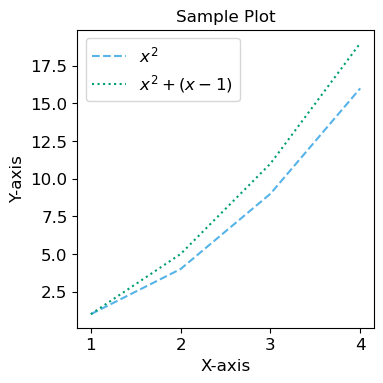

In [87]:


# To save plot
# plt.savefig('my_figure.png')

    # note MW: pdf or svg very convenient
    # note MW: also convenient:
        # plt.tight_layout() and 
        # plt.savefig('blabla.pdf', bbox_inches='tight')

# plt.savefig will use latest figure that was last displayed

    # either make sure you have the right one
    # or
    # data.plot(kind='bar')
    # fig = plt.gcf() # get current figure
    # fig.savefig('my_figure.png')

# good practice

    # make text large enough in powerpoints
         # use  fontsize parameter in xlabel, ylabel, title, and legend, and tick_params with labelsize
    # make symbols readable
        # ie large enough; "s" parameter to increase size

    # be careful with colors (only) to distinguish lines
        # use color-blind friendly palette 
            # color-blind emulators:
                # https://www.color-blindness.com/coblis-color-blindness-simulator/
                # https://colororacle.org/
        # linestyle to counter black-white printing, or marker for scatter plots

########
# good practice example:

import matplotlib.pyplot as plt

# Bang Wong colorblind-friendly color scheme (https://www.nature.com/articles/nmeth.1618)
colors_bangwong = [
    "#E69F00",  # Orange
    "#56B4E9",  # Sky Blue
    "#009E73",  # Bluish Green
    "#F0E442",  # Yellow
    "#0072B2",  # Blue
    "#D55E00",  # Vermillion
    "#CC79A7",  # Reddish Purple
    "#000000"   # Black
]

plt.style.use('default')
fig, ax = plt.subplots(1,1, figsize=(10/2.54,10/2.54))
ax.plot([1,2,3,4], [1,4,9,16], linestyle='--', color=colors_bangwong[1], label=r'$x^2$')
ax.plot([1,2,3,4], [1,5,11,19], linestyle=':', color=colors_bangwong[2], label=r'$x^2+(x-1)$')
ax.legend()
ax.set_xlabel('X-axis', fontsize=12)
ax.set_ylabel('Y-axis', fontsize=12)
ax.set_title('Sample Plot', fontsize=12)
ax.legend(fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
# plt.show()
# plt.savefig('/Users/m.wehrens/Desktop/202503_Python-Gapminder-testingcode.pdf', dpi=300, bbox_inches='tight')
# plt.close(fig)

# Some convenient code for solutions

gdpPercap_1952    108382.35290
gdpPercap_1957    113523.13290
gdpPercap_1962     95458.11176
gdpPercap_1967     80894.88326
gdpPercap_1972    109347.86700
Name: max, dtype: float64


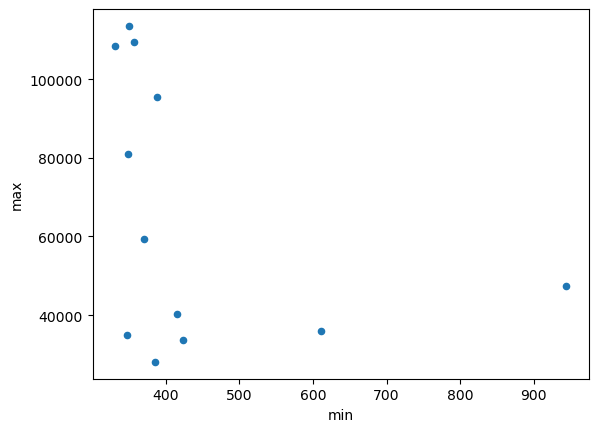

In [38]:
# Correlations

# The carpentries solution is pretty elegant, but perhaps not first thing you thought of.
data_asia = pd.read_csv('/Users/m.wehrens/Data_UVA/2024_teaching/2025-03-gapminder/data/gapminder_gdp_asia.csv', \
    index_col='country')

# Their solution:
# data_asia.describe().T.plot(kind='scatter', x='min', y='max')

# print(data_asia.head())

data_asia.loc['max'] = data_asia.max()
data_asia.loc['min'] = data_asia.min()

data_asia.T.plot(x='min', y='max', kind='scatter')

print(data_asia.loc['max'].head())

# conclusion: there's no correlation, so "they don't rise and fall together"
    # note: if min was low, and they would follow each other, max should be low as well
    
##########

# Correlations continued

# 'Seems the variability in this value is due to a sharp drop after 1972. 
# Some geopolitics at play perhaps? Given the dominance of oil producing 
# countries, maybe the Brent crude index would make an interesting comparison?
#  Whilst Myanmar consistently has the lowest GDP, the highest GDP nation 
# has varied more notably.'

# Random code

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(-2.0, 0, 'gdpPercap_2002'),
  Text(0.0, 0, 'gdpPercap_1952'),
  Text(2.0, 0, 'gdpPercap_1962'),
  Text(4.0, 0, 'gdpPercap_1972'),
  Text(6.0, 0, 'gdpPercap_1982'),
  Text(8.0, 0, 'gdpPercap_1992'),
  Text(10.0, 0, 'gdpPercap_2002'),
  Text(12.0, 0, '')])

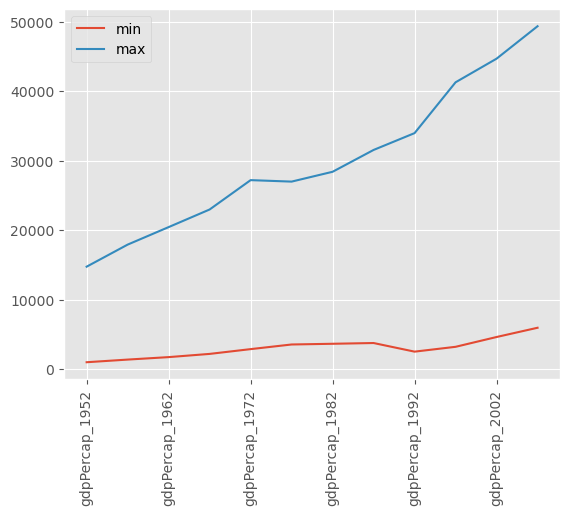

In [36]:
data_europe = pd.read_csv('/Users/m.wehrens/Data_UVA/2024_teaching/2025-03-gapminder/data/gapminder_gdp_europe.csv', \
    index_col='country')
data_europe.min().plot(label='min')
data_europe.max().plot(label='max')
plt.legend(loc='best')
plt.xticks(rotation=90)

<Axes: xlabel='min', ylabel='max'>

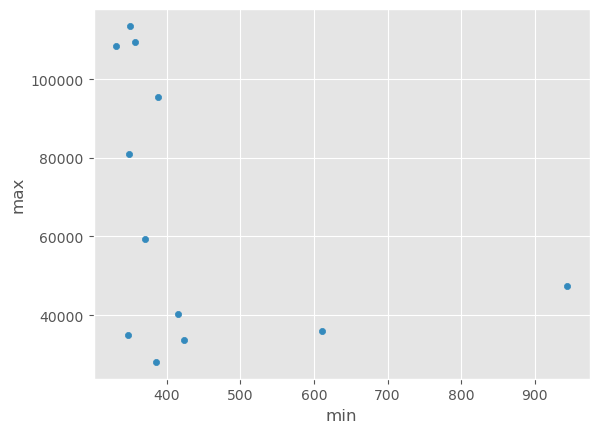

In [76]:
data_asia = pd.read_csv('/Users/m.wehrens/Data_UVA/2024_teaching/2025-03-gapminder/data/gapminder_gdp_asia.csv', \
    index_col='country')
data_asia.describe().T.plot(kind='scatter', x='min', y='max')

In [38]:
data_asia.describe()

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,5195.484004,5787.732940,5729.369625,5971.173374,8187.468699,7791.314020,7434.135157,7608.226508,8639.690248,9834.093295,10174.090397,12473.026870
std,18634.890865,19506.515959,16415.857196,14062.591362,19087.502918,11815.777923,8701.176499,8090.262765,9727.431088,11094.180481,11150.719203,14154.937343
min,331.000000,350.000000,388.000000,349.000000,357.000000,371.000000,424.000000,385.000000,347.000000,415.000000,611.000000,944.000000
25%,749.681655,793.577415,825.623201,836.197138,1049.938981,1175.921193,1443.429832,1704.686583,1785.402016,1902.252100,2092.712441,2452.210407
50%,1206.947913,1547.944844,1649.552153,2029.228142,2571.423014,3195.484582,4106.525293,4106.492315,3726.063507,3645.379572,4090.925331,4471.061906
75%,3035.326002,3290.257643,4187.329802,5906.731805,8597.756202,11210.089480,12954.791010,11643.572680,15215.657900,19702.055810,19233.988180,22316.192870
max,108382.352900,113523.132900,95458.111760,80894.883260,109347.867000,59265.477140,33693.175250,28118.429980,34932.919590,40300.619960,36023.105400,47306.989780


In [63]:
# data_asia.loc[:,'min']
data_asia.columns
data_asia.index

Index(['Afghanistan', 'Bahrain', 'Bangladesh', 'Cambodia', 'China',
       'Hong Kong China', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel',
       'Japan', 'Jordan', 'Korea Dem. Rep.', 'Korea Rep.', 'Kuwait', 'Lebanon',
       'Malaysia', 'Mongolia', 'Myanmar', 'Nepal', 'Oman', 'Pakistan',
       'Philippines', 'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Syria',
       'Taiwan', 'Thailand', 'Vietnam', 'West Bank and Gaza', 'Yemen Rep.'],
      dtype='object', name='country')

In [70]:
data_asia.head()

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007,max,min
country,,,,,,,,,,,,,,
Afghanistan,779.445314,820.853030,853.100710,836.197138,739.981106,786.113360,978.011439,852.395945,649.341395,635.341351,726.734055,974.580338,978.011439,635.341351
Bahrain,9867.084765,11635.799450,12753.275140,14804.672700,18268.658390,19340.101960,19211.147310,18524.024060,19035.579170,20292.016790,23403.559270,29796.048340,29796.048340,9867.084765
Bangladesh,684.244172,661.637458,686.341554,721.186086,630.233627,659.877232,676.981866,751.979403,837.810164,972.770035,1136.390430,1391.253792,1391.253792,630.233627
Cambodia,368.469286,434.038336,496.913648,523.432314,421.624026,524.972183,624.475478,683.895573,682.303175,734.285170,896.226015,1713.778686,1713.778686,368.469286
China,400.448611,575.987001,487.674018,612.705693,676.900092,741.237470,962.421381,1378.904018,1655.784158,2289.234136,3119.280896,4959.114854,4959.114854,400.448611


In [75]:
print(data_asia.index)
print(data_asia.columns)

Index(['Afghanistan', 'Bahrain', 'Bangladesh', 'Cambodia', 'China',
       'Hong Kong China', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel',
       'Japan', 'Jordan', 'Korea Dem. Rep.', 'Korea Rep.', 'Kuwait', 'Lebanon',
       'Malaysia', 'Mongolia', 'Myanmar', 'Nepal', 'Oman', 'Pakistan',
       'Philippines', 'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Syria',
       'Taiwan', 'Thailand', 'Vietnam', 'West Bank and Gaza', 'Yemen Rep.'],
      dtype='object', name='country')
Index(['gdpPercap_1952', 'gdpPercap_1957', 'gdpPercap_1962', 'gdpPercap_1967',
       'gdpPercap_1972', 'gdpPercap_1977', 'gdpPercap_1982', 'gdpPercap_1987',
       'gdpPercap_1992', 'gdpPercap_1997', 'gdpPercap_2002', 'gdpPercap_2007',
       'max', 'min'],
      dtype='object')


Text(36797.93332, 79.762, 'Netherlands')

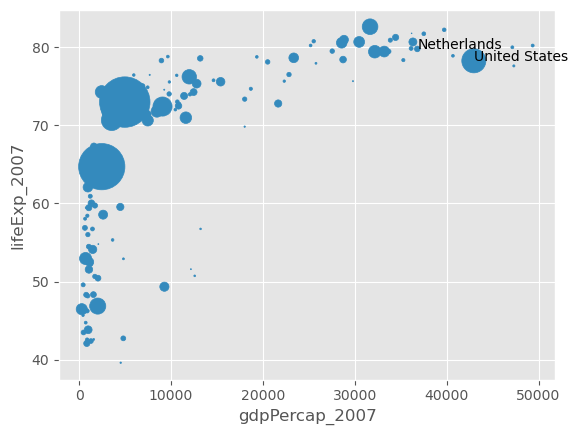

In [84]:
df_all = \
    pd.read_csv('/Users/m.wehrens/Data_UVA/2024_teaching/2025-03-gapminder/data/gapminder_all.csv', index_col='country')

df_all.plot(kind='scatter', x='gdpPercap_2007', y='lifeExp_2007', s=df_all['pop_2007']/1e6)
plt.text(df_all.loc['United States','gdpPercap_2007'], df_all.loc['United States','lifeExp_2007'], 'United States')
plt.text(df_all.loc['Netherlands','gdpPercap_2007'], df_all.loc['Netherlands','lifeExp_2007'], 'Netherlands')
